<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_452866790_1_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.007)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 452866790
period = 0.607365062671417  # Orbital period in days
epoch = 1491.77124137826
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.08]
folded_lc = folded_lc[folded_lc.time > -0.08]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_452866790_all_sector_lightcurve.csv


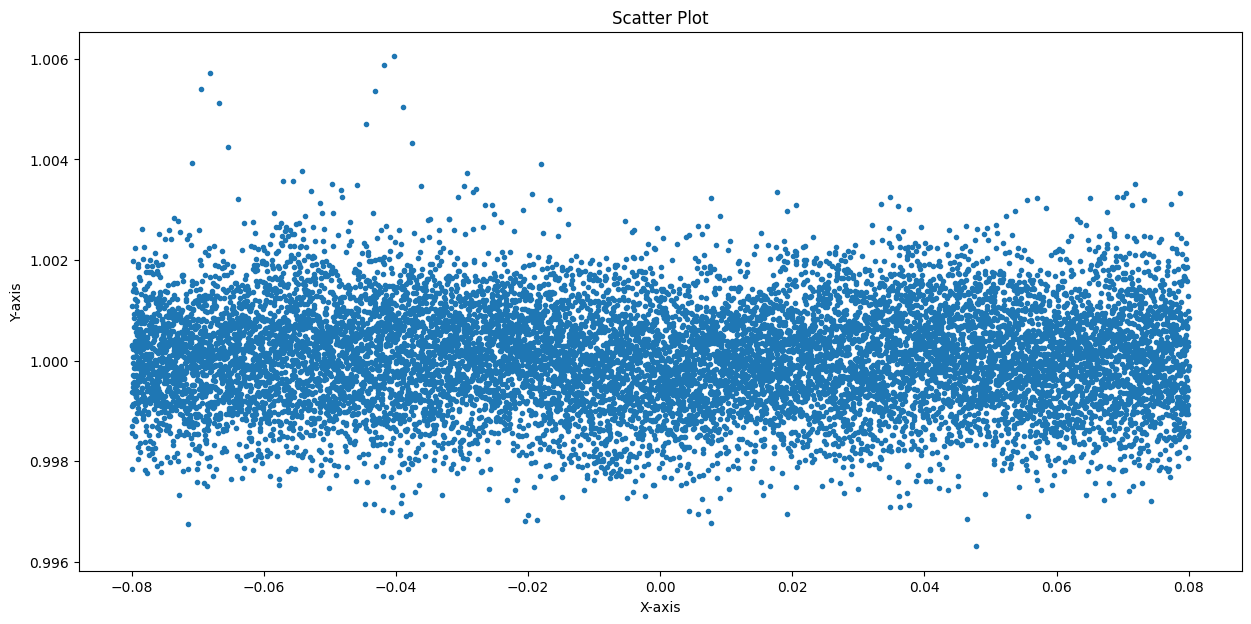

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([7, 34, 61])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-7-b8ebf7f09c11>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_7, ap_34, ap_61])


Sector 7


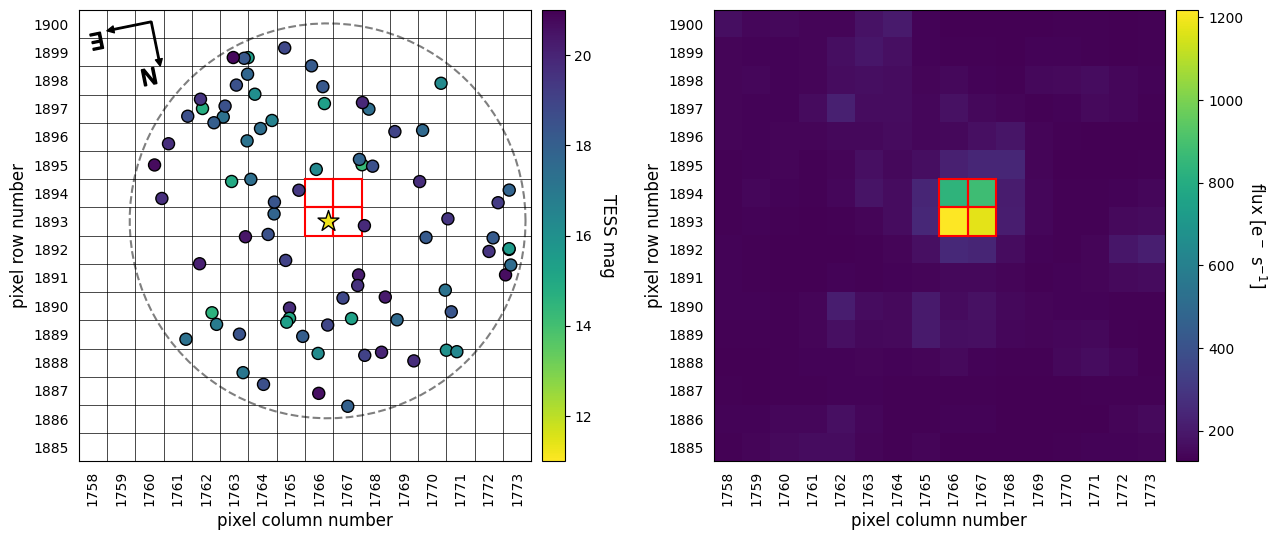

Sector 34


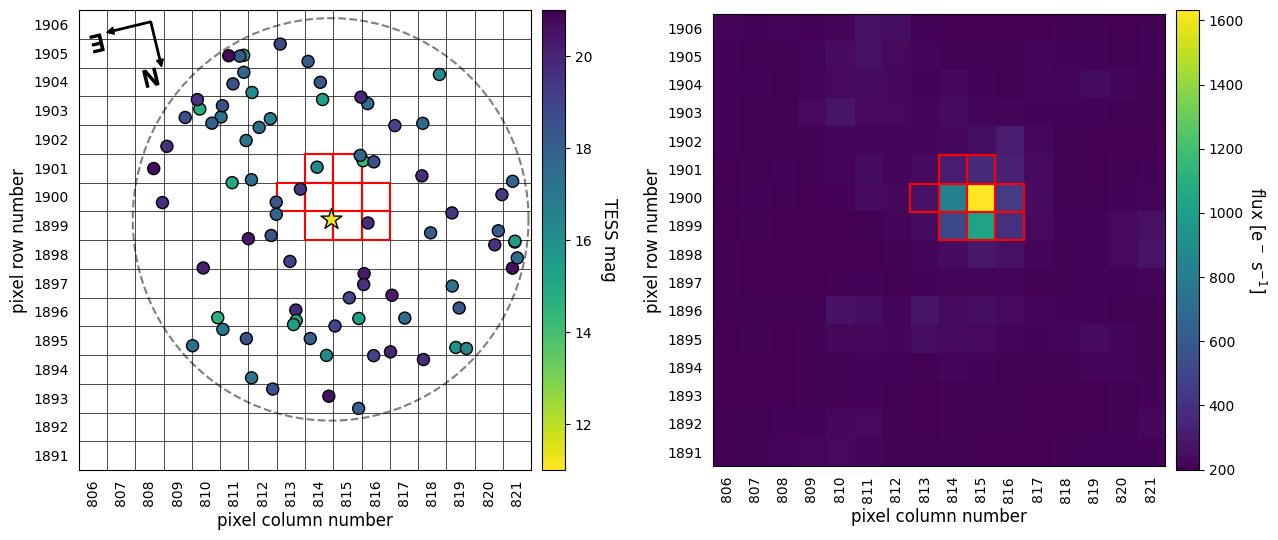

Sector 61


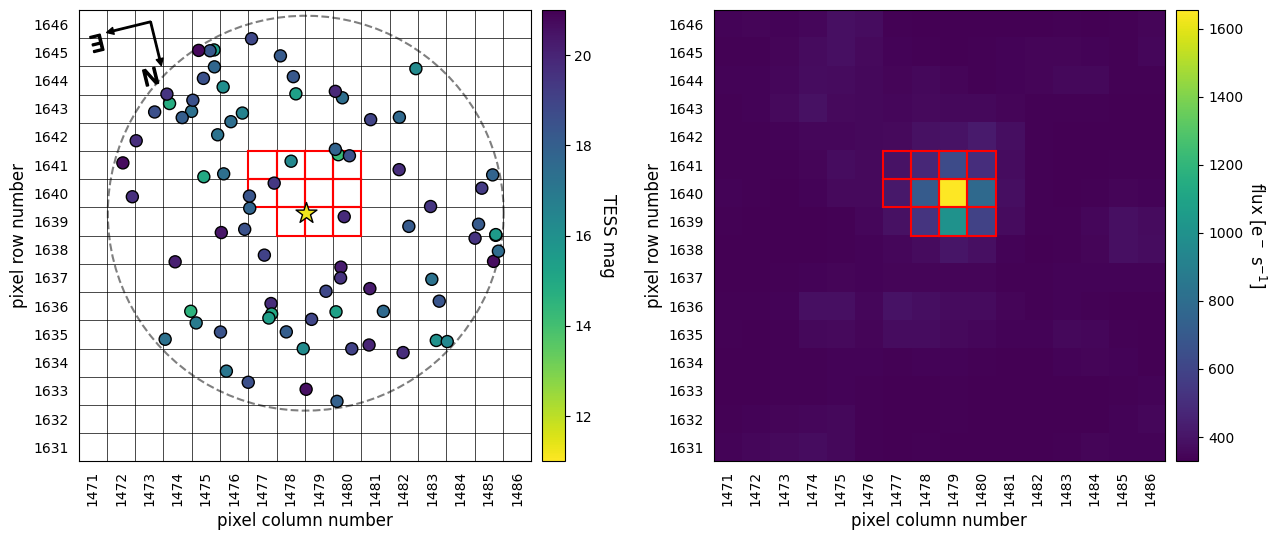

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,452866790,11.1972,9.627,9.063,8.829,120.595345,3.338803,0.339440,0.354529,3329.0,36.515000,0.000,0.000
1,804130389,19.8270,NaN,NaN,NaN,120.588040,3.341307,NaN,NaN,NaN,1.038520,27.757,288.945
2,804130381,19.3715,NaN,NaN,NaN,120.599939,3.331369,NaN,NaN,NaN,1.619840,31.447,148.334
3,452866793,16.3309,15.651,15.350,15.200,120.595538,3.327829,1.030000,0.985430,5740.0,0.334380,39.514,178.998
4,452866791,17.7620,16.060,15.354,15.185,120.605974,3.335182,NaN,NaN,NaN,NaN,40.362,108.844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,452866780,17.3223,15.767,15.125,14.941,120.629103,3.357153,0.318349,0.336281,3361.0,2.335820,138.140,61.430
76,804130437,20.6663,NaN,NaN,NaN,120.561293,3.357171,NaN,NaN,NaN,NaN,139.100,298.385
77,804130465,17.9264,NaN,NaN,NaN,120.598870,3.377519,NaN,NaN,4605.0,0.592336,139.952,5.192
78,452866782,17.5065,16.352,15.625,15.337,120.559826,3.355376,0.630000,0.721831,4012.0,0.647245,140.906,295.051


In [7]:
ap_7 = np.array([[1766.0, 1893.0], [1766.0, 1894.0], [1767.0, 1893.0], [1767.0, 1894.0]])
ap_34 = np.array([[813.0, 1900.0], [814.0, 1899.0], [814.0, 1900.0], [814.0, 1901.0], [815.0,
        1899.0], [815.0, 1900.0], [815.0, 1901.0], [816.0, 1899.0], [816.0, 1900.0]])
ap_61 = np.array([[1477.0, 1640.0], [1477.0, 1641.0], [1478.0, 1639.0], [1478.0, 1640.0], [
        1478.0, 1641.0], [1479.0, 1639.0], [1479.0, 1640.0], [1479.0, 1641.0], [1480.0,
        1639.0], [1480.0, 1640.0], [1480.0, 1641.0]])

apertures = np.array([ap_7, ap_34, ap_61])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.229 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,452866790,11.1972,9.627,9.063,8.829,120.595345,3.338803,0.339440,0.354529,3329.0,36.515000,0.000,0.000,9.677014e-01,0.000237
1,804130389,19.8270,NaN,NaN,NaN,120.588040,3.341307,NaN,NaN,NaN,1.038520,27.757,288.945,2.444366e-04,0.936848
2,804130381,19.3715,NaN,NaN,NaN,120.599939,3.331369,NaN,NaN,NaN,1.619840,31.447,148.334,3.781375e-04,0.605600
3,452866793,16.3309,15.651,15.350,15.200,120.595538,3.327829,1.030000,0.985430,5740.0,0.334380,39.514,178.998,5.519658e-03,0.041488
4,452866791,17.7620,16.060,15.354,15.185,120.605974,3.335182,NaN,NaN,NaN,NaN,40.362,108.844,5.806992e-04,0.394352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,452866780,17.3223,15.767,15.125,14.941,120.629103,3.357153,0.318349,0.336281,3361.0,2.335820,138.140,61.430,1.277813e-16,0.000000
76,804130437,20.6663,NaN,NaN,NaN,120.561293,3.357171,NaN,NaN,NaN,NaN,139.100,298.385,2.574837e-14,0.000000
77,804130465,17.9264,NaN,NaN,NaN,120.598870,3.377519,NaN,NaN,4605.0,0.592336,139.952,5.192,4.321253e-18,0.000000
78,452866782,17.5065,16.352,15.625,15.337,120.559826,3.355376,0.630000,0.721831,4012.0,0.647245,140.906,295.051,2.481837e-13,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 452866790.
Calculating EB and EBx2P scenario probabilities for 452866790.
Calculating PTP scenario probability for 452866790.
Calculating PEB and PEBx2P scenario probabilities for 452866790.
Calculating STP scenario probability for 452866790.
Calculating SEB and SEBx2P scenario probabilities for 452866790.
Calculating DTP scenario probability for 452866790.
Calculating DEB and DEBx2P scenario probabilities for 452866790.
Calculating BTP scenario probability for 452866790.
Calculating BEB and BEBx2P scenario probabilities for 452866790.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 804130389.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 804130381.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 452866793.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 452866791.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 804130382.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 4

In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.4976999
NFPP = 0.06381913


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,452866790,TP,0.339440,0.354529,0.607365,82.868391,0.407129,0.509295,137.943932,0.526603,0.000000,0.000000,0.384124
1,452866790,EB,0.339440,0.354529,0.607365,52.071621,1.396839,0.688709,74.627905,0.000000,0.263944,0.286852,0.001550
2,452866790,EBx2P,0.339440,0.354529,1.214730,83.663342,1.018897,0.597073,197.032701,0.000000,0.332600,0.345427,0.017139
3,452866790,PTP,0.339440,0.354529,0.607365,80.931246,0.323116,0.665366,112.576561,0.546556,0.000000,0.000000,0.095674
4,452866790,PEB,0.339440,0.354529,0.607365,40.522775,1.610686,0.713850,64.238339,0.000000,0.240278,0.266122,0.000288
5,452866790,PEBx2P,0.339440,0.354529,1.214730,84.674994,0.443173,0.772287,180.229581,0.000000,0.325658,0.339588,0.003037
6,452866790,STP,0.335987,0.348270,0.607365,82.163489,0.320989,0.610150,96.374237,0.631688,0.000000,0.000000,0.131825
7,452866790,SEB,0.325684,0.339610,0.607365,40.323538,1.687414,0.714540,62.756341,0.000000,0.250460,0.275082,0.000301
8,452866790,SEBx2P,0.137968,0.168390,1.214730,85.848462,1.024638,0.647317,201.742076,0.000000,0.137828,0.168231,0.002023
9,452866790,DTP,0.339440,0.354529,0.607365,83.317462,0.510509,0.340538,144.724359,0.523835,0.000000,0.000000,0.022501


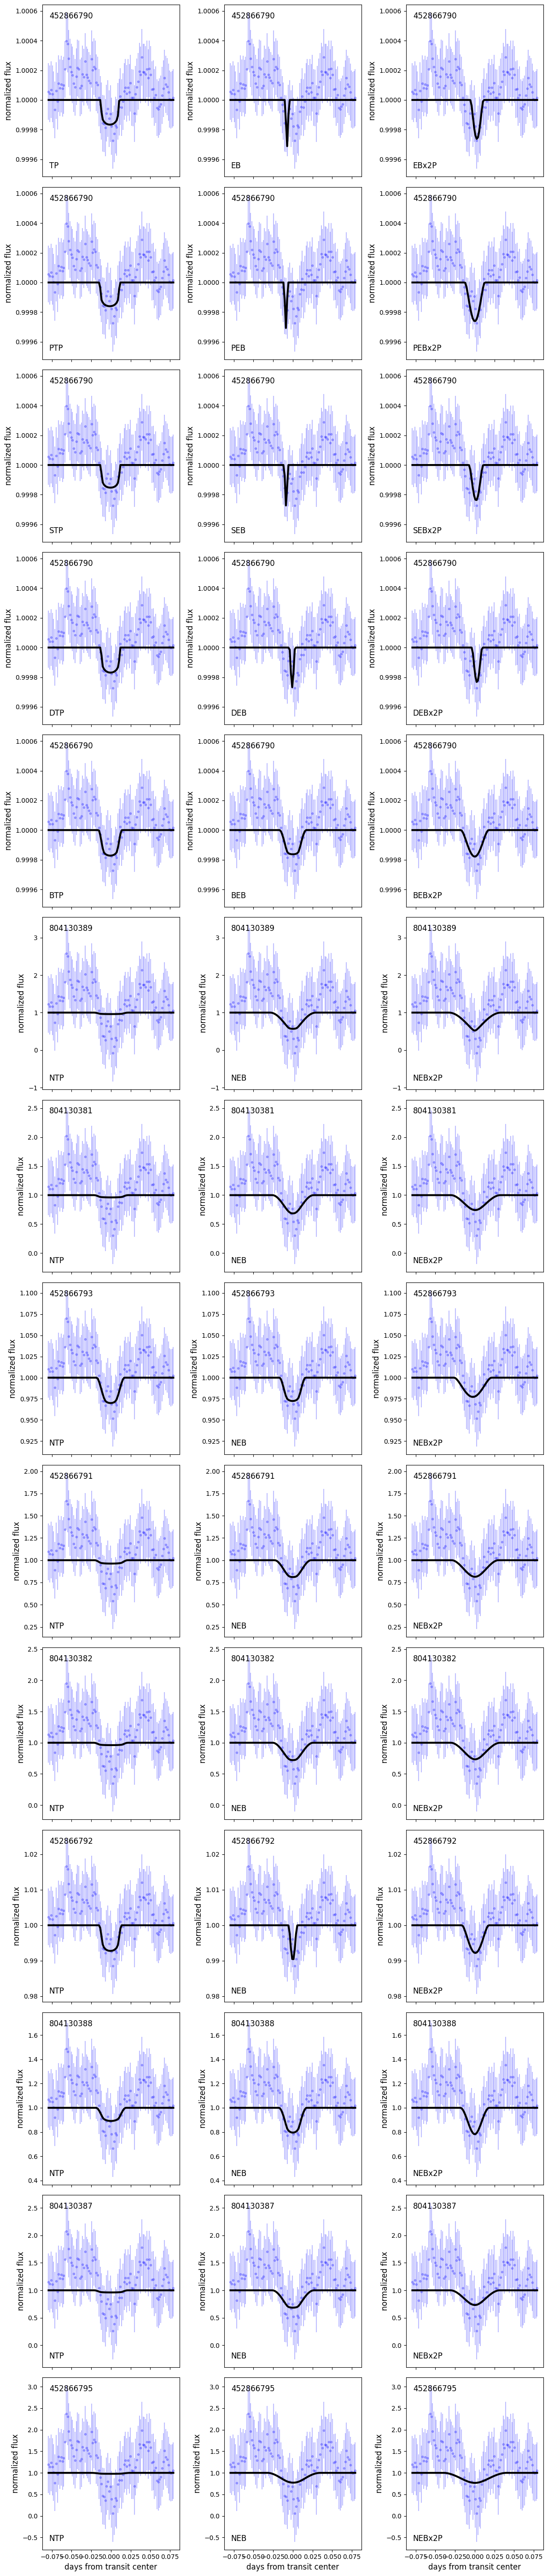

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time
# Repetion reduced
FPPs = np.zeros(10)
NFPPs = np.zeros(10)
for i in range(10):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.49940669907375224 +/- 0.0021408985658369216
NFPP = 0.06416828460674653 +/- 0.00044444680312380133
CPU times: user 3h 58min 28s, sys: 2min 53s, total: 4h 1min 22s
Wall time: 2h 32min 52s


Our final conclusion about this specified planet of TIC 452866790 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).